In [11]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ELU, LeakyReLU
from tensorflow.keras.activations import swish
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [12]:
#Load the dataset
data = pd.read_csv("/content/Pizza_Dataset.csv")
X = data.drop("Order ",axis=1)
y = data["Order "].values

In [13]:
print(data.columns)

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Fiber', 'Order '], dtype='object')


In [14]:
data.dtypes

,0
Calories,int64
Protein,int64
Fat,int64
Carbs,int64
Fiber,int64
Order,int64


In [15]:
#Train Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
#Activation Fuctions to test
activations = {
    "relu",
    "sigmoid",
    "tanh",
    ELU(alpha=1.0),
    LeakyReLU(alpha=0.01),
    swish
}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [17]:
#Store Accuracy Scores
accuracy_scores = []

In [18]:
# Iterate Over Activation Functions
for activ_func in activations:
    print(f"Training with activation function: {activ_func}")
    # Build Model
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation=activ_func))
    model.add(Dense(8, activation=activ_func))
    model.add(Dense(1, activation='sigmoid'))

    # Compile and Train
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

    # Evaluate
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(accuracy)
    print(f"Accuracy with {activ_func}: {accuracy:.2f}")

Training with activation function: tanh


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy with tanh: 0.50
Training with activation function: sigmoid
Accuracy with sigmoid: 0.60
Training with activation function: <function silu at 0x7de9dce73a60>
Accuracy with <function silu at 0x7de9dce73a60>: 0.40
Training with activation function: <LeakyReLU name=leaky_re_lu, built=True>
Accuracy with <LeakyReLU name=leaky_re_lu, built=True>: 0.60
Training with activation function: <ELU name=elu, built=True>
Accuracy with <ELU name=elu, built=True>: 0.70
Training with activation function: relu
Accuracy with relu: 0.50


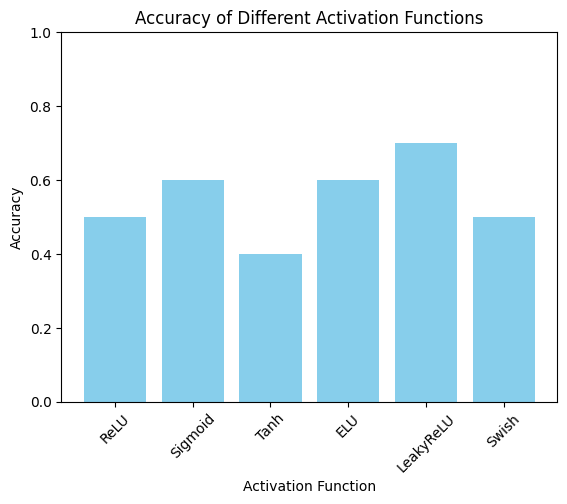

In [19]:
# Visualization of Accuracy Scores
activation_labels = ['ReLU', 'Sigmoid', 'Tanh', 'ELU', 'LeakyReLU', 'Swish']
plt.bar(activation_labels, accuracy_scores, color='skyblue')
plt.title("Accuracy of Different Activation Functions")
plt.xlabel("Activation Function")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()